In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Power Parameters
h=6.6260700e-34                 #Planck's Constant
kb=1.38064852e-23               #Boltzmann's Constant
c=2.998e8;                          #Light Velocity in vacuum
Tsum=300;                      #CMB Temperature
Twin=273;                      #CMB Temperature
freq=np.arange(40e9,200e9,1e9); #Frequency vector
tausum=0.25;
tauwin=0.04;
esum=1-np.exp(-tausum);         #Emissivity 0.22
ewin=1-np.exp(-tauwin);         #Emissivity 0.04
bwrel=0.25;                     #relative bandwidth
eta=0.55;

In [29]:
# Calculations
wav=c/freq;                     #Wavelenght vector
sang=(wav)**2;                  #Solid angle of antenna
Bsum=((2*h*freq**3)/(c**2))*(1/(np.exp((h*freq)/(kb*Tsum))-1));
Bwin=((2*h*freq**3)/(c**2))*(1/(np.exp((h*freq)/(kb*Twin))-1)); #Spectral Radiance
Psum=eta*esum*Bsum*sang*bwrel*freq;                                    #Power
Pwin=eta*ewin*Bwin*sang*bwrel*freq;                                    #Power

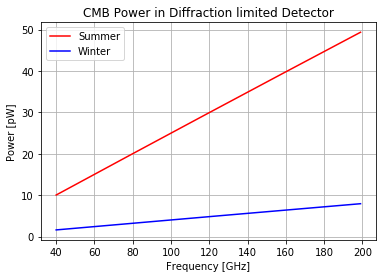

In [30]:
#Ploting CMB power

fig, ax = plt.subplots()
ax.plot(freq/1e9,Psum/1e-12,'r',freq/1e9,Pwin/1e-12,'b')

ax.set(xlabel='Frequency [GHz]', ylabel='Power [pW]',
       title='CMB Power in Diffraction limited Detector')
ax.grid()
ax.legend(['Summer','Winter'])

fig.savefig("Atmosphere-POWER.pdf")
plt.show()

In [31]:
# NEP Parameters
m=1;               #m=1 polarized detector,m=2 otherwise.
bw=bwrel*freq;     #Bandwidth.

In [32]:
# NEP Calculation
NEPsum=np.sqrt(2*h*freq*Psum+(2*Psum**2)/(m*bw));        #Noise Equivalent Power with bunching term
NEPwin=np.sqrt(2*h*freq*Pwin+(2*Pwin**2)/(m*bw));        #Noise Equivalent Power with bunching term

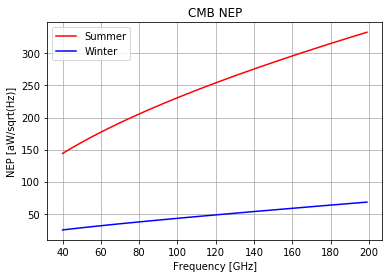

In [33]:
#Ploting NEP
fig, ax = plt.subplots()
ax.plot(freq/1e9,NEPsum/1e-18,'r',freq/1e9,NEPwin/1e-18,'b')


ax.set(xlabel='Frequency [GHz]', ylabel='NEP [aW/sqrt(Hz)]',
       title='CMB NEP')
ax.grid()
ax.legend(['Summer','Winter'])

fig.savefig("Atmosphere-NEP.pdf")
plt.show()

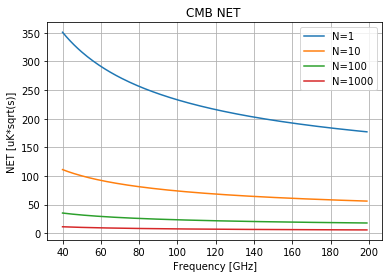

In [18]:
#Ploting Temperature

fig, ax = plt.subplots()
ax.plot(freq/1e9,NET/1e-6,freq/1e9,NET10/1e-6,freq/1e9,NET100/1e-6,freq/1e9,NET1000/1e-6)

ax.set(xlabel='Frequency [GHz]', ylabel='NET [uK*sqrt(s)]',
       title='CMB NET ')
ax.grid()
ax.legend(('N=1', 'N=10', 'N=100', 'N=1000'))


fig.savefig("CBM-NET.pdf")
plt.show()